In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')
# Add 'overweight' column
df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x ==1 else 1)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['id','cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df_cat.groupby(['cardio','variable','value']).count()
    df_cat = df_cat.reset_index().rename(columns={'id':'total'})




    # Draw the catplot with 'sns.catplot()'

    fig = sns.catplot(
        data=df_cat, x="variable", y="total", kind="bar", hue="value", col="cardio"
        )

    # Get the figure for the output
    


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    
    df = df.loc[df['ap_hi'] >= df['ap_lo']]
    df = df.loc[df['height'] >= df['height'].quantile(0.025)]
    df = df.loc[df['height'] <= df['height'].quantile(0.975)]
    df = df.loc[df['weight'] >= df['weight'].quantile(0.025)]
    df_heat = df.loc[df['weight'] <= df['weight'].quantile(0.975)]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    

    # Set up the matplotlib figure
    plt.figure(figsize=(14,8))
    

    # Draw the heatmap with 'sns.heatmap()'
    with sns.axes_style("white"):
        ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="coolwarm", linewidths=.5)
        plt.show()

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')
df.head()

df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)
df.head()


df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x ==1 else 1)
df.head()



,id,cardio,variable,value
0,0,0,cholesterol,0
1,1,1,cholesterol,1
2,2,1,cholesterol,1
3,3,1,cholesterol,0
4,4,0,cholesterol,0
...,...,...,...,...
349995,99993,0,overweight,1
349996,99995,1,overweight,1
349997,99996,1,overweight,1
349998,99998,1,overweight,1


In [65]:
df_cat = df_cat.groupby(['cardio','variable','value']).count()
df_cat = df_cat.reset_index().rename(columns={'id':'total'})

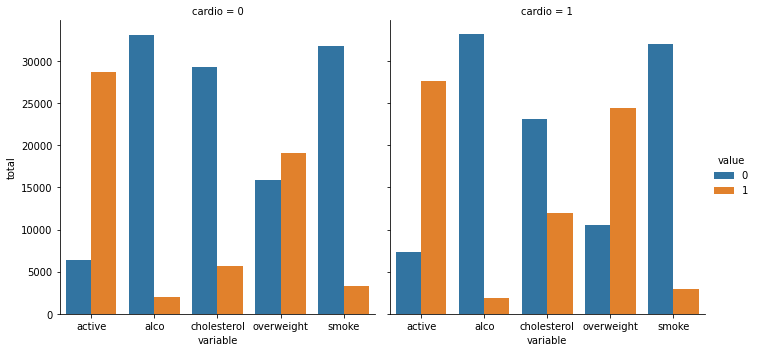

In [69]:
fig = sns.catplot(
        data = df_cat, x = 'variable', y = 'total', col='cardio', hue = 'value',  kind='bar'
        )

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv('medical_examination.csv')
# Add 'overweight' column

df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1 if x > 25 else 0)
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x ==1 else 1)
for i in df:
    if i == 'id':
        continue
    df[i] = df[i].astype(int)
df = df.loc[df['ap_hi'] >= df['ap_lo']]
df = df.loc[df['height'] >= df['height'].quantile(0.025)]
df = df.loc[df['height'] <= df['height'].quantile(0.975)]
df = df.loc[df['weight'] >= df['weight'].quantile(0.025)]
df_heat = df.loc[df['weight'] <= df['weight'].quantile(0.975)]


Clean the data. Filter out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile

In [38]:
corr = df_heat.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

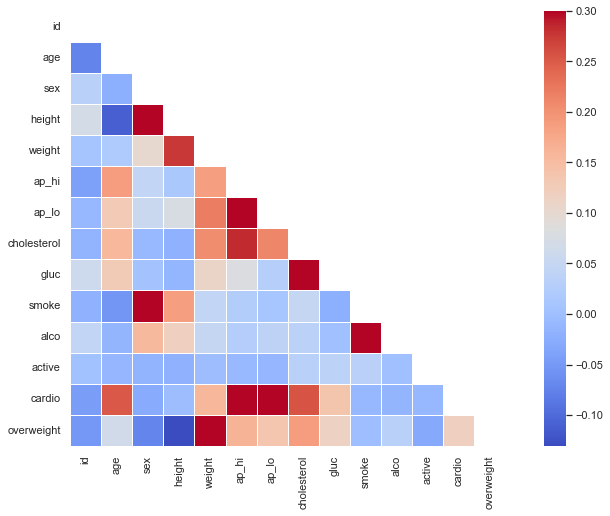

In [53]:
plt.figure(figsize=(14,8))
with sns.axes_style("white"):
        fig = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="coolwarm", linewidths=.5)
        plt.show()

In [ ]:


# Draw Categorical Plot
def draw_cat_plot():
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    # Import data
    df = pd.read_csv('medical_examination.csv')
    # Add 'overweight' column
    df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1   if x > 25 else 0)

    # Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
    df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
    df['gluc'] = df['gluc'].apply(lambda x: 0 if x ==1 else 1)
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['id','cardio'], value_vars=['cholesterol', 'gluc',   'smoke', 'alco', 'active', 'overweight'])

    df_cat = df_cat.groupby(['cardio','variable','value']).count()
    df_cat = df_cat.reset_index().rename(columns={'id':'total'})




    # Draw the catplot with 'sns.catplot()'

    fig = sns.catplot(data=df_cat, x="variable", y="total", kind="bar", hue="value",       col="cardio")

    # Get the figure for the output



    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    # Clean the data
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np

    # Import data
    df = pd.read_csv('medical_examination.csv')
    # Add 'overweight' column
    df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2)).apply(lambda x: 1   if x > 25 else 0)

    # Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
    df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
    df['gluc'] = df['gluc'].apply(lambda x: 0 if x ==1 else 1)
    df = df.loc[df['ap_hi'] >= df['ap_lo']]
    df = df.loc[(df['height'] >= df['height'].quantile(0.025)) & (df['height'].quantile(0.975) >= df['height']) ]
    df_heat = df.loc[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'].quantile(0.975) >= df['weight']) ]

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle

    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True


    # Set up the matplotlib figure
    plt.figure(figsize=(14,8))


    # Draw the heatmap with 'sns.heatmap()'
    with sns.axes_style("white"):
        fig = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap="coolwarm",   linewidths=.5)
        plt.show()

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig
